In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df_happy = pd.read_csv('hotel_happy_reviews.csv')
df_not_happy = pd.read_csv('hotel_not_happy_reviews.csv')

In [3]:
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [4]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vmullachery/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vmullachery/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

In [6]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vmullachery/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [9]:
#
# Time consuming function
#
def get_prepared_text_from_dataframe(df):
    """
    Argument: Dataframe with text in 'Description' field
    """
    text_data = []
    for line in df.loc[:, 'Description'].values:
        tokens = prepare_text_for_lda(line)
        text_data.append(tokens)
    return text_data

In [ ]:
#len(text_data), type(text_data), type(text_data[0]), type(text_data[0][0])

In [11]:
#
# Time consuming function call
#
#len(df_happy.loc[:, 'Description'].values)
prepared_text = get_prepared_text_from_dataframe(pd.concat([df_not_happy, df_happy]))

In [12]:
len(prepared_text), type(prepared_text), type(prepared_text[0]), type(prepared_text[0][0])
assert(len(prepared_text) == (df_happy.shape[0] + df_not_happy.shape[0]))
#38932

In [13]:
#text_data[0][0], prepared_text[0][0]

In [14]:
from gensim import corpora
dictionary = corpora.Dictionary(prepared_text)
corpus = [dictionary.doc2bow(text) for text in prepared_text]

In [15]:
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

/Users/vmullachery/anaconda/envs/dl3.6/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [16]:
#
# Takes a few minutes to run, and save model file
#
import gensim
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)


(0, '0.053*"hotel" + 0.025*"great" + 0.020*"staff" + 0.017*"location"')
(1, '0.020*"service" + 0.016*"great" + 0.014*"beautiful" + 0.013*"wonderful"')
(2, '0.014*"hyatt" + 0.009*"....." + 0.008*"waldorf" + 0.007*"venue"')
(3, '0.036*"hotel" + 0.020*"check" + 0.016*"would" + 0.012*"front"')
(4, '0.023*"hotel" + 0.015*"bathroom" + 0.013*"floor" + 0.012*"night"')


/Users/vmullachery/anaconda/envs/dl3.6/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [17]:
ldamodel.get_topics().shape

(5, 38358)

In [18]:
ldamodel.show_topics()

[(0,
  '0.053*"hotel" + 0.025*"great" + 0.020*"staff" + 0.017*"location" + 0.015*"stay" + 0.014*"clean" + 0.013*"rooms" + 0.012*"breakfast" + 0.011*"would" + 0.011*"friendly"'),
 (1,
  '0.020*"service" + 0.016*"great" + 0.014*"beautiful" + 0.013*"wonderful" + 0.011*"enjoy" + 0.009*"amaze" + 0.009*"suite" + 0.009*"staff" + 0.008*"love" + 0.008*"experience"'),
 (2,
  '0.014*"hyatt" + 0.009*"....." + 0.008*"waldorf" + 0.007*"venue" + 0.005*"meeting" + 0.005*"grand" + 0.004*"baltimore" + 0.004*"regency" + 0.004*"palmer" + 0.004*"catering"'),
 (3,
  '0.036*"hotel" + 0.020*"check" + 0.016*"would" + 0.012*"front" + 0.012*"service" + 0.011*"night" + 0.011*"staff" + 0.010*"could" + 0.008*"arrive" + 0.008*"call"'),
 (4,
  '0.023*"hotel" + 0.015*"bathroom" + 0.013*"floor" + 0.012*"night" + 0.011*"small" + 0.011*"rooms" + 0.011*"would" + 0.010*"shower" + 0.008*"could" + 0.007*"lobby"')]

In [19]:
#
#Try a new document
#
def get_topics_from_comments(review_comments):
    review_comments = prepare_text_for_lda(review_comments)
    review_comments_bow = dictionary.doc2bow(review_comments)
    return review_comments_bow, ldamodel.get_document_topics(review_comments_bow)



In [20]:
bow, topics = get_topics_from_comments('Excellent view and great staff')
print(topics)
print(bow)


[(0, 0.79890281), (1, 0.050749533), (2, 0.050000019), (3, 0.050296385), (4, 0.050051223)]
[(57, 1), (85, 1), (667, 1)]


In [21]:
bow, topics = get_topics_from_comments('terrible')
print(topics)
print(bow)

[(0, 0.10000004), (1, 0.1000002), (2, 0.10000098), (3, 0.59631199), (4, 0.10368682)]
[(973, 1)]


In [22]:
for i in range(5):
    bow, topics = get_topics_from_comments(df_happy.loc[i, 'Description'])
    print(topics)

[(0, 0.44398409), (1, 0.5110566), (2, 0.033618625)]
[(0, 0.53690195), (4, 0.44705305)]
[(0, 0.87916303), (2, 0.035079081), (4, 0.079329342)]
[(0, 0.40309444), (1, 0.40222397), (3, 0.18524666)]
[(0, 0.91945994), (1, 0.020129943), (2, 0.020000033), (3, 0.020193949), (4, 0.020216132)]


In [23]:
def parse_topics_tuples(topics, t):
    for (k, v) in topics:
        if k == t:
            return v
    return 0

def create_topic_rating_df(df1, df2):
    df_topics = pd.concat([df1, df2])
    df_topics['t0'] = [parse_topics_tuples(get_topics_from_comments(x)[1], 0) for x in df_topics['Description']]
    df_topics['t1'] = [parse_topics_tuples(get_topics_from_comments(x)[1], 1) for x in df_topics['Description']]
    df_topics['t2'] = [parse_topics_tuples(get_topics_from_comments(x)[1], 2) for x in df_topics['Description']]
    df_topics['t3'] = [parse_topics_tuples(get_topics_from_comments(x)[1], 3) for x in df_topics['Description']]
    df_topics['t4'] = [parse_topics_tuples(get_topics_from_comments(x)[1], 4) for x in df_topics['Description']]
    return df_topics


In [24]:
#
# Takes around 10 minutes to run
#
df_topics = create_topic_rating_df(df_not_happy, df_happy)

In [25]:
df_topics.head()

,User_ID,Description,Is_Response,hotel_ID,t0,t1,t2,t3,t4
0,id10326,The room was kind of clean but had a VERY stro...,not happy,3,0.380888,0.012519,0.012500,0.012735,0.581333
1,id10327,I stayed at the Crown Plaza April -- - April -...,not happy,9,0.194846,0.043337,0.042979,0.206084,0.512565
2,id10328,I booked this hotel through Hotwire at the low...,not happy,3,0.388519,0.000000,0.000000,0.215880,0.390666
3,id10330,My girlfriends and I stayed here to celebrate ...,not happy,3,0.112306,0.147558,0.019955,0.718234,0.000000
4,id10332,My husband and I have stayed in this hotel a f...,not happy,7,0.579922,0.000000,0.000000,0.068023,0.337600


In [26]:
df_happy.shape, df_not_happy.shape

((26521, 4), (12411, 4))

In [27]:
df_topics[['t0','t1']].values

array([[ 0.38088825,  0.01251871],
       [ 0.19484639,  0.0433371 ],
       [ 0.3885195 ,  0.        ],
       ..., 
       [ 0.85897464,  0.        ],
       [ 0.21622176,  0.        ],
       [ 0.68926507,  0.02295103]])

In [28]:
import seaborn as sns
from collections import Counter

In [29]:
# Takes a few minutes to run
#
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,random_state=7)
Z2 = tsne.fit_transform(df_topics[['t0', 't1', 't2', 't3']].values)

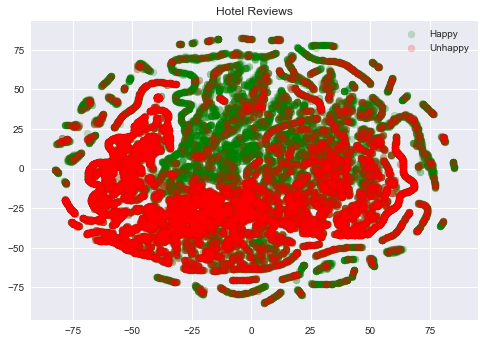

In [30]:
not_happy_indices = df_topics[df_topics['Is_Response'] == 'not happy'].index.values
happy_indices = df_topics[df_topics['Is_Response'] == 'happy'].index.values
plt.scatter(Z2[happy_indices,0], Z2[happy_indices,1], c='g',alpha=.2,label='Happy') #Happy in green
plt.scatter(Z2[not_happy_indices,0], Z2[not_happy_indices,1], c='r',alpha=.2,label='Unhappy') #not happy in red
plt.legend(loc='upper right', bbox_to_anchor=(1.,1.0))
plt.title('Hotel Reviews')

In [31]:
#3D
# takes around 10 minutes or so
#
tsne=TSNE(n_components=3,random_state=7)
Z3 = tsne.fit_transform(df_topics[['t0', 't1', 't2', 't3']].values)


<IPython.core.display.Javascript object>


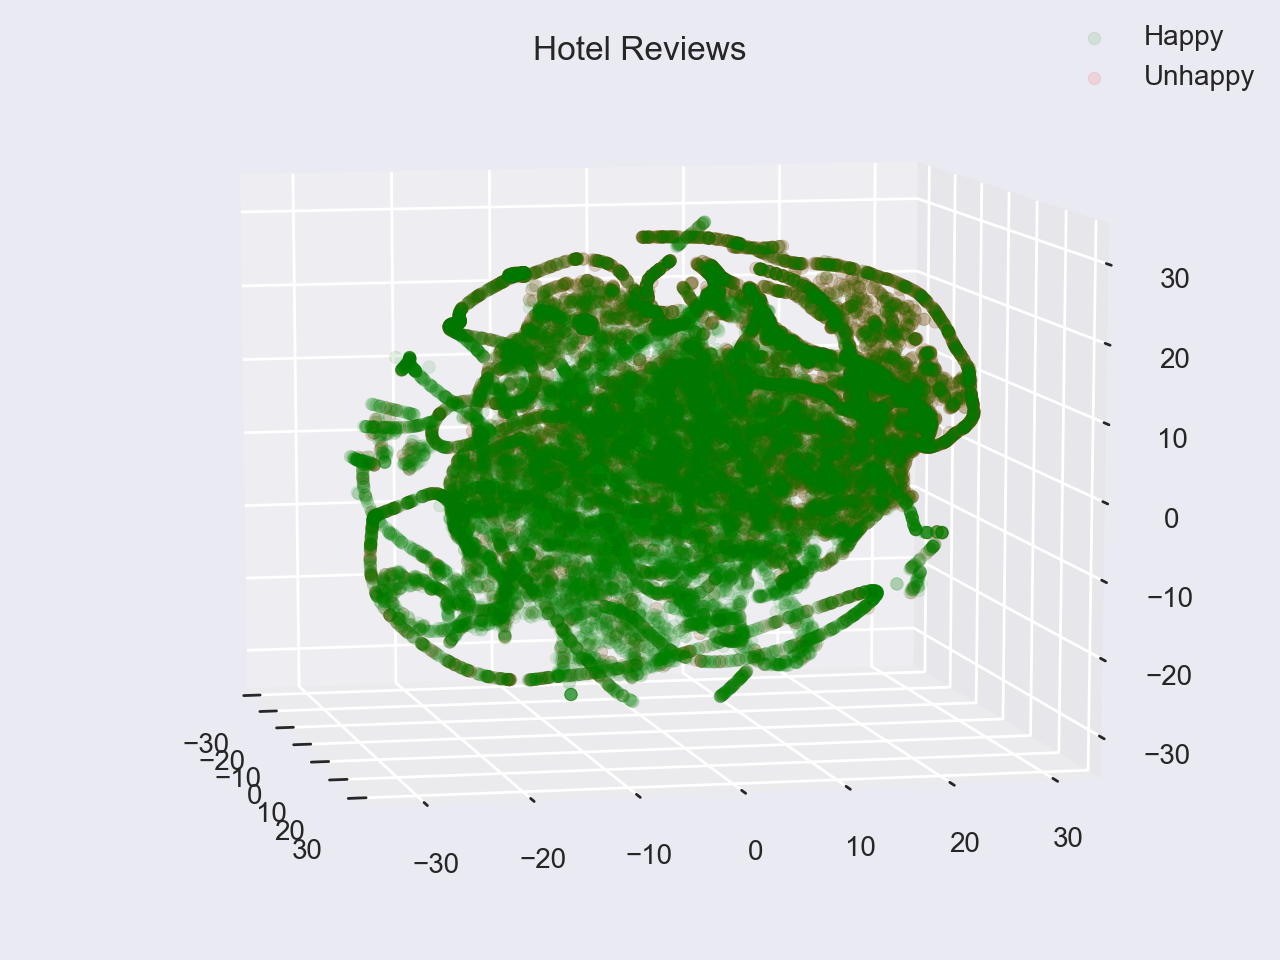

In [32]:
#3D scatter interactive plot
# Change to qt, run the cell, change it back to notebook, rerun the cell -- now should be interactive

#%matplotlib qt
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Z3[happy_indices,0], Z3[happy_indices,1], Z3[happy_indices,2], c='g',alpha=.1,label='Happy')#happy
ax.scatter(Z3[not_happy_indices,0], Z3[not_happy_indices,1], Z3[not_happy_indices,2], c='r',alpha=.1,label='Unhappy')#unhappy
plt.legend(loc='upper right', bbox_to_anchor=(1.,1.0))
plt.title('Hotel Reviews')
plt.show()


In [33]:
type(corpus), len(corpus), #corpus[0], corpus[3]


(list, 38932)

In [34]:
top0_repr = ldamodel.show_topic(0, topn=5)

#sns.scatter()

In [35]:
## Visualization#
#
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/Users/vmullachery/anaconda/envs/dl3.6/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/Users/vmullachery/anaconda/envs/dl3.6/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


## LDA Using TFIDF


In [40]:
from gensim import corpora, models
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
from pprint import pprint
for doc in corpus_tf:
    pprint(doc)
    break


[(0, 0.26794907529279621),
 (1, 0.1776185762288387),
 (2, 0.10111218046104628),
 (3, 0.080002052959658163),
 (4, 0.26117340216137669),
 (5, 0.5060423333767029),
 (6, 0.34864250974425298),
 (7, 0.21465007910647216),
 (8, 0.33900003007178731),
 (9, 0.13859076057498604),
 (10, 0.15283914114157521),
 (11, 0.25822168155456926),
 (12, 0.068212211874873863),
 (13, 0.39252791389166469),
 (14, 0.072225753423287006)]


In [41]:
#
# Takes 2 min approx
#
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5, id2word=dictionary, passes=2, workers=4)

In [44]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {}, word: {}'.format(idx, topic))

Topic: 0, word: 0.003*"great" + 0.002*"night" + 0.002*"stay" + 0.002*"rooms" + 0.002*"would" + 0.002*"clean" + 0.002*"place" + 0.002*"staff" + 0.002*"service" + 0.002*"hotel"
Topic: 1, word: 0.002*"night" + 0.002*"would" + 0.002*"great" + 0.002*"rooms" + 0.002*"check" + 0.002*"hotel" + 0.002*"location" + 0.002*"service" + 0.002*"charge" + 0.002*"place"
Topic: 2, word: 0.002*"great" + 0.002*"service" + 0.002*"place" + 0.002*"would" + 0.002*"night" + 0.002*"hotel" + 0.002*"clean" + 0.001*"staff" + 0.001*"stay" + 0.001*"rooms"
Topic: 3, word: 0.005*"great" + 0.004*"clean" + 0.004*"location" + 0.004*"rooms" + 0.004*"staff" + 0.003*"breakfast" + 0.003*"friendly" + 0.003*"hotel" + 0.003*"comfortable" + 0.003*"stay"
Topic: 4, word: 0.003*"great" + 0.003*"check" + 0.003*"service" + 0.003*"would" + 0.003*"staff" + 0.003*"night" + 0.003*"rooms" + 0.002*"hotel" + 0.002*"stay" + 0.002*"could"
